In [118]:
""" Do complete version of prediction of house using multiple linear regression gradient descent
    1 - load and feature scale the data (DONE)
    2 - Apply gradient descent compute_cost,gradient,compute_gradient
    3 - scatter prediction vs target 
    4 - predict price of one example
"""
import numpy as np 
import matplotlib.pyplot as plt
import math,copy
np.set_printoptions(precision=2) 

In [119]:
data = np.loadtxt("./data/houses.txt",delimiter=',',skiprows=1)
X_train = data [:,:4]
y_train = data [:,4]
X_features = np.array(["size","bedrooms","floors","age"]); print (X_train.shape[-1]) # num of features


4


In [120]:
""" (X- mean) / standard deviation      X for every feature column """
# X_dump = np.array([[20,1000,9,100]
#                   ,[55,2000,5,600],
#                    [20,7000,7,400],
#                    [20,5000,3,240]])
def z_normalization(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X=(X-mu)/sigma
    return mu,sigma,X
# print(z_normalization(X_dump))

In [121]:
""" 
    j(w,b) = (1/2m) * sum of ((wx+b)-y)^2
"""
def compute_cost(X,y,w,b):
    j_w_b =  0 
    m = X.shape[0]
    for i in range(m):
        j_w_b = j_w_b + ((np.dot(w,X[i])+b)-y[i])**2
    j_w_b=j_w_b/2
    return j_w_b


In [122]:
""" dj_dw = 1/m * sum of ((wx+b)-y) * X
    dj_db = 1/m * sum of ((wx+b)-y)
"""
def compute_gradiant(X,y,w,b):
    dj_dw=np.zeros(X.shape[-1])
    dj_db=0
    m=X.shape[0]
    for i in range(m):
        err=((np.dot(w,X[i])+b)-y[i])
        dj_dw += np.dot(err,X[i])
        dj_db += err
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw,dj_db  


In [123]:
""" repeat
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
"""
def gradiant_descent(X,y,w,b,alpha,num_of_iterations):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    hist ={"i_hist":[],"w_hist":[],"b_hist":[],"cost_hist":[]}

    
    for i in range(num_of_iterations):
        dj_dw,dj_db = compute_gradiant(X,y,w,b)
        w = w - alpha * dj_dw  
        b = b - alpha * dj_db
        hist["i_hist"].append(i)  
        hist["w_hist"].append(w)
        hist["b_hist"].append(b)
        hist["cost_hist"].append(compute_cost(X,y,w,b))
        if i % math.ceil(num_of_iterations/10)==0:
            print(f"at iteration {i:3d} weight = {w} bias = {b} cost = {hist['cost_hist'][-1]} ")
        
    return w,b

In [124]:
""" Lets test our gradiant descent"""
mu,sigma,X_norm = z_normalization(X_train)
w_final ,b_final = gradiant_descent(X_norm,y_train,np.zeros(X_train.shape[-1]),0,1e-1,1000)
print(f"\nOptimal weight = {w_final} Optimal  bias = {b_final}")
print (f"{mu}")

at iteration   0 weight = [ 8.91  2.95  3.28 -5.96] bias = 36.31560808080808 cost = 5704086.2196746925 
at iteration 100 weight = [107.92 -19.95 -31.2  -38.48] bias = 363.1473994679121 cost = 21887.477037406716 
at iteration 200 weight = [110.47 -21.22 -32.66 -37.99] bias = 363.1560805774923 cost = 21701.681128697557 
at iteration 300 weight = [110.56 -21.27 -32.71 -37.97] bias = 363.15608080807465 cost = 21701.4758409943 
at iteration 400 weight = [110.56 -21.27 -32.71 -37.97] bias = 363.15608080808056 cost = 21701.47561411768 
at iteration 500 weight = [110.56 -21.27 -32.71 -37.97] bias = 363.15608080808056 cost = 21701.475613866933 
at iteration 600 weight = [110.56 -21.27 -32.71 -37.97] bias = 363.15608080808056 cost = 21701.47561386667 
at iteration 700 weight = [110.56 -21.27 -32.71 -37.97] bias = 363.15608080808056 cost = 21701.475613866653 
at iteration 800 weight = [110.56 -21.27 -32.71 -37.97] bias = 363.15608080808056 cost = 21701.47561386667 
at iteration 900 weight = [110.

In [125]:
"Use matplotlib to compare between prediction and target"

'Use matplotlib to compare between prediction and target'

In [126]:
""" predict house price ["size","bedrooms","floors","age"] 
                        [1.22e+03 2.00e+00 1.00e+00 3.50e+01]
    Normalize then  f(X) = W.X + b 
"""


def predict(X_norm,w_final,b_final): # X_norm w_final b_final
    m =X_norm.shape[0]
    y_predict = np.zeros(m)
    for i in range(m):
        y_predict[i]=np.dot(w_final,X_norm[i])+b_final
    return y_predict



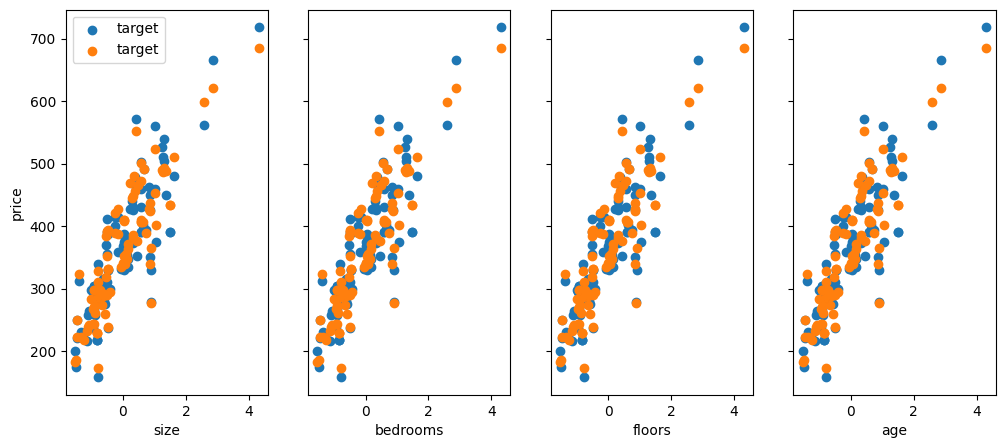

In [127]:
fig,ax= plt.subplots(1,4,figsize=(12,5),sharey=True,)
plt.scatter
for i in range(X_norm.shape[-1]):
    ax[i].scatter(X_norm[:,0],y_train,label="target")
    ax[i].scatter(X_norm[:,0],predict(X_norm,w_final,b_final),label="target")
    ax[i].set_xlabel(X_features[i] )
ax[0].set_ylabel("price")    
ax[0].legend()    
